<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/week10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10 - Convolutional Neural Networks

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2024-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_16-ConvNets/Lecture_16-ConvNets.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2024-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_16-ConvNets/Lecture_16-ConvNets.ipynb)

<a id='top'></a>

- [16.1 Introduction to Convolutional Neural Networks](#16.1-introduction-to-convolutional-neural-networks)
- [16.2 Loading the Dataset](#16.2-loading-the-dataset)
- [16.3 Creating, Training, and Evaluating a CNN Model](#16.3-creating,-training,-and-evaluating-a-cnn-model)
- [16.4 Introduce a Validation Dataset](#16.4-introduce-a-validation-dataset)
- [16.5 Dropout Layers](#16.5-dropout-layers)
- [16.6 Batch Normalization](#16.6-batch-normalization)
- [16.7 Data Augmentation](#16.7-data-augmentation)
- [16.8 Transfer Learning](#16.8-transfer-learning)
- [References](#references)

## 10.1 Convolutional Neural Networks入門

**Convolutional Neural Networks (CNNs)**、別名**ConvNets**

* CNNs は画像認識・分類、画像セグメンテーション、物体検出といった様々なコンピュータビジョンタスクを加速させてきました。また、自動運転車、医療画像診断、知能ロボットなど、関連する多くの応用分野で活用されています。

* 典型的なCNNのアーキテクチャは、以下の3種類の主要レイヤーで構成されています：
  - Convolutional layers（畳み込み層）畳み込みとは線形結合のこと　隣同士などの位置関係を考慮している
  - Pooling layers（プーリング層）
  - Fully-connected layers（全結合層/密結合層）

* CNNは通常、複数のconvolutional layersとpooling layersのブロックがあり、その後にfully-connected layersが続きます。最適なレイヤー数はタスクに依存し、トレーニングとモデル選択の過程でユーザーが調整する必要があるハイパーパラメータとなります。

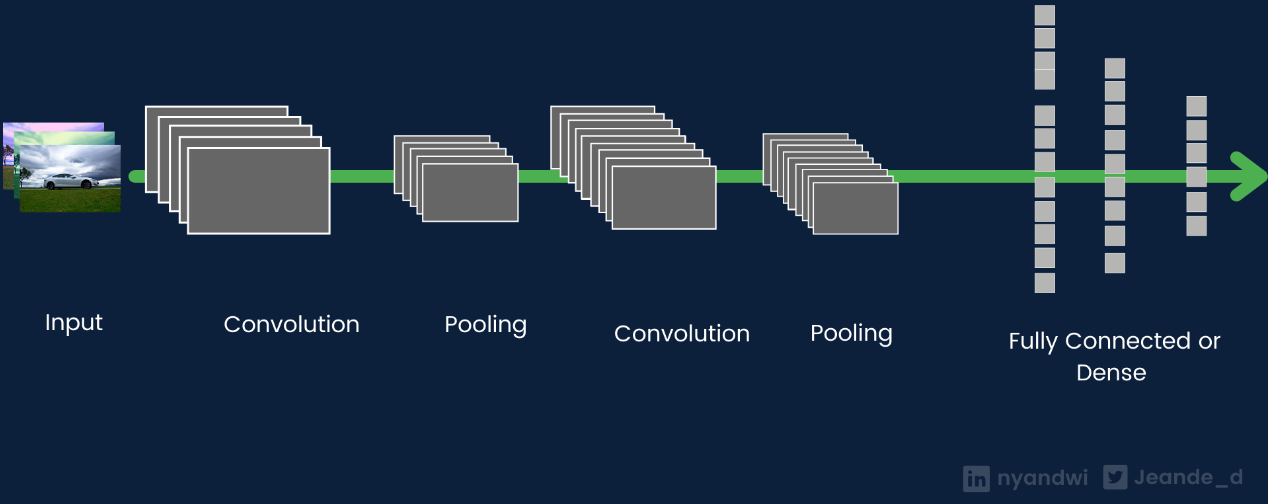

CNNの各レイヤーについて、以下のように入力画像をより高次の表現へと変換していきます：

* 初期レイヤーでは、エッジや線といった低レベルの特徴（low-level features）を学習します。

* 中間レイヤーでは、テクスチャーやパーツといった中レベルの特徴（mid-level features）を学習します。

* 最後のレイヤーでは、物体などの高レベルの特徴（high-level features）を学習します。

* Fully-connected layers（全結合層）は、これらの学習された高レベル特徴を使用して、入力画像の分類を行います。

これらのレイヤーが階層的に特徴を抽出することで、CNNは効果的な画像認識を実現しています。

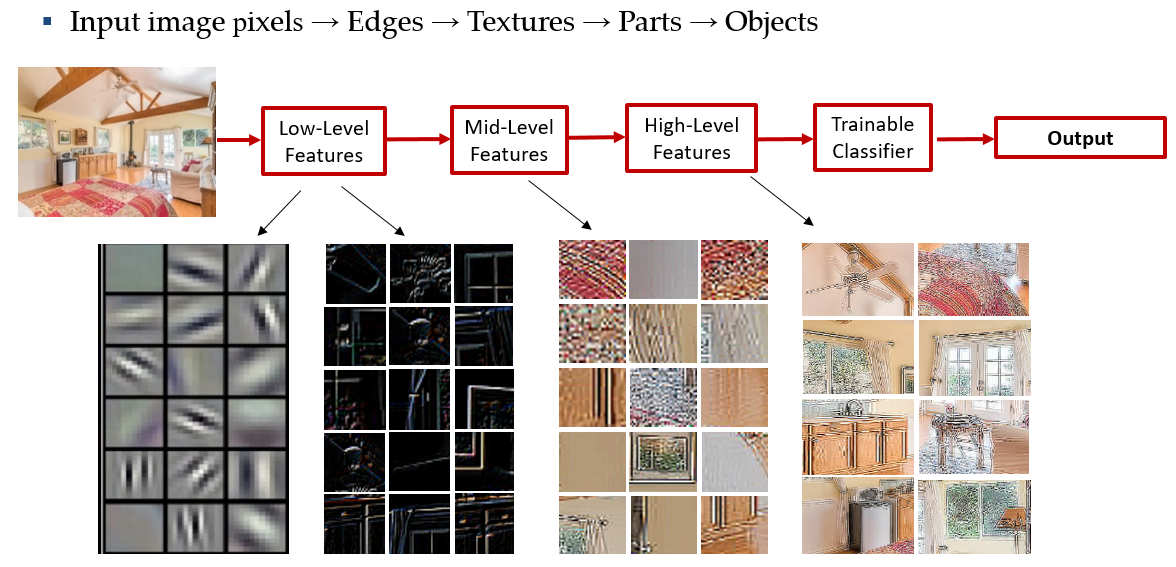

### Convolutional Layers

1. フィルターは入力ボリュームの幅と高さに沿ってスライド（または畳み込み）します
2. 各位置で、フィルターと入力の間で要素ごとの乗算を実行します
3. これらの乗算をすべて合計して、1つの数値を得ます
4. このプロセスにより、2次元のアクティベーションマップまたは特徴マップが作成されます

Convolutional layersの主要なパラメータには以下のものがあります：

- Filter size（フィルターサイズ）：畳み込みの視野を決定します。これ自体はウェイト（パラメーター）です。
- Stride（ストライド）：フィルターが入力ボリュームをどのように畳み込むかを制御します
- Padding（パディング）：入力ボリュームの境界の周りにゼロを埋めることがあります
- Number of filters（フィルター数）：各フィルターが異なる特徴を検出します

例えば、5x5の画像と3x3のフィルターがある場合、畳み込み演算はこの3x3フィルターを5x5画像の上でスライドさせます。各位置で、対応する数値を掛け合わせて合計します。これにより、フィルターが画像内でそのパターンを検出した場所を示す特徴マップが生成されます。３×３のフィルターの1、0はあとで学習されて変更されるらしい

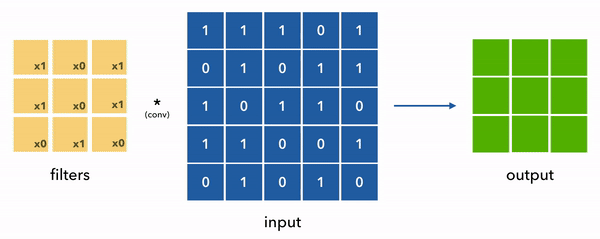

現代のディープラーニングライブラリ（TensorFlowやPyTorchなど）では、以下のように1行のコードでconvolutional layersを作成することができます：

```python
tf.keras.layers.Conv2D(.....)
```

画像処理に使用される2D畳み込みフィルターの他に：
* 3D畳み込みレイヤー：ビデオ分析に使用
* 1D畳み込みレイヤー：時系列データの分析に使用

Convolutional layerの出力は高次元の特徴マップとなり、その次元はレイヤーで使用される畳み込みフィルターの数に依存します。例えば：
* レイヤーに32個のフィルターがある場合
* 出力として32個の特徴マップが生成されます

これらのライブラリを使用することで、複雑な畳み込み演算の実装を簡素化し、効率的なディープラーニングモデルの構築が可能となります。

### プーリングレイヤー（Pooling layers）

プーリングレイヤーの主な目的：
* Convolutional layersで出力された特徴マップのサイズを縮小
* ネットワークパラメータ数の削減
* モデルのトレーニングにおける計算コストの削減

プーリングレイヤーの利点：
* 前のレイヤーの特徴マップから重要な情報を選択
* 入力画像内の物体の正確な位置に対するモデルの感度を低減
* 入力データのノイズの影響を軽減

実装について：
* 最も一般的なのはMaxpooling layer（最大プーリング層）
* 最大の強度を持つピクセルを保持することで画像サイズを縮小
* 主要なフレームワークでは非常にシンプルに実装可能：

```python
tf.keras.layers.MaxPooling2D(...)
```

例えば、pool_size=2の場合：
* 2x2ピクセルの各領域から
* 最大値を選択して出力とします

プーリングレイヤーは効率的なモデル構築に重要な役割を果たしています。

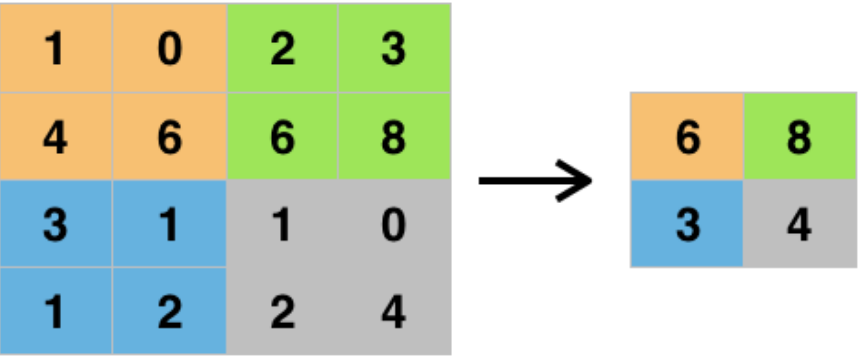

ネットワークの構造：

**エンコーダー（Encoder）**
* Convolutional layersとPooling layersで構成される部分
* 入力データの情報を、対象タスクにより適した表現形式にエンコード（符号化）する役割
* ネットワークの特徴抽出部分を担当

**クラシファイアー（Classifier）**
* 別名：*head*（ヘッド）や*top*（トップ）とも呼ばれる
* Fully-connected layersで構成される部分
* エンコーダーが抽出した特徴を基に最終的な分類を実行
* ネットワークの判断部分を担当

この2つの部分が連携することで、CNNは効果的な画像認識を実現しています。

### 完全結合層（Fully-connected Layers）または密結合層（Densely-connected Layers）

* CNNの最終層に位置する層です
* 主な役割：
  - 前層で生成された特徴マップを
  - 元の画像のラベルと対応付けを行う

TensorFlowでは、以下のように簡単に実装できます：
```python
tf.keras.layers.Dense(....)
```

この層では：
* 前の層からの全ての出力（特徴マップ）が
* 次の層の全てのニューロンに接続される
* これにより、抽出された特徴を基に最終的な分類判断が行われます

## 10.2  データセットの読込


画像分類の代表的なデータセット「**CIFAR-10**」を使用します。

CIFAR-10の基本情報：
* 60,000枚のカラー画像
* 10カテゴリーに分類
* 各クラス6,000枚の画像を含む

分類カテゴリー：airplane（飛行機）、automobile（自動車）、bird（鳥）、cat（猫）、deer（鹿）、dog（犬）、frog（カエル）、horse（馬）、ship（船）、truck（トラック）

データセットの構成：
* トレーニング用：50,000枚
* テスト用：10,000枚
* テストデータでの最高精度：約90%

注：100クラスの「CIFAR-100」も存在します。

Kerasでの実装：
```python
keras.datasets.cifar10.load_data()
```

In [ ]:
# import required libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Print the version of tf
print("TensorFlow version:{}".format(tf.__version__))

TensorFlow version:2.17.1


In [ ]:
# Load the train and test images and labels
(train_data, train_label), (test_data, test_label) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


- Training & Test Data
- データの次元数や各セットのサンプル数を確認することができます。

In [ ]:
print('Training images', train_data.shape)
print('Training labels', train_label.shape)
print('Testing images', test_data.shape)
print('Testing labels', test_label.shape)

Training images (50000, 32, 32, 3)
Training labels (50000, 1)
Testing images (10000, 32, 32, 3)
Testing labels (10000, 1)


### データの前処理

画像のピクセル強度値について：
* 値の範囲：0から255
* データ型：`uint8`（8ビットの符号なし整数）
  - 2⁰ = 1 から 2⁸ = 256 までの値をとる

ピクセル値の意味：
* 0：黒のピクセル
* 255：白のピクセル
* その他の値：中間の色

このような形式で各ピクセルの強度値が表現されています。

In [ ]:
# Display the range of images
print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))
print('Average pixel value', np.mean(train_data))
print('Data type', train_data[0].dtype)

Max pixel value 255
Min pixel value 0
Average pixel value 120.70756512369792
Data type uint8


ニューラルネットワークでの画像処理において、ピクセル値の正規化について説明します：

一般的な正規化：
* ピクセル値を[0, 1]の範囲に変換
* 計算方法：各ピクセル値を255で割る

正規化の利点：
* ネットワークの学習が高速化
* より良い結果が得られやすい

注意点：
* 正規化後のデータ型は`float64`になる
* 0から1の範囲の小数値として扱われる

In [ ]:
# Normalize the images
train_data = train_data / 255
test_data = test_data / 255

In [ ]:
# Display the range of images (to make sure they are in the [0, 1] range)
print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))
print('Average pixel value', np.mean(train_data))
print('Data type', train_data[0].dtype)

Max pixel value 1.0
Min pixel value 0.0
Average pixel value 0.4733630004850874
Data type float64


   CIFAR-10の10個のクラスのラベル

---


   
| Label | Description |
| ----- | ----------- |
| 0     | airplane    |
| 1     | automobile  |
| 2     | bird        |
| 3     | cat         |
| 4     | deer        |
| 5     | dog         |
| 6     | frog        |
| 7     | horse       |
| 8     | ship        |
| 9     | truck       |


- ラベルの最初の10個の値を確認してみましょう。各ラベルが10個のカテゴリーのいずれかに対応していることがわかります。
- また、最初の100個のラベルをプロットしてみると、値が0から9の間にあることが確認でき、データが正しく設定されていることがわかります。

In [ ]:
print(train_label[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


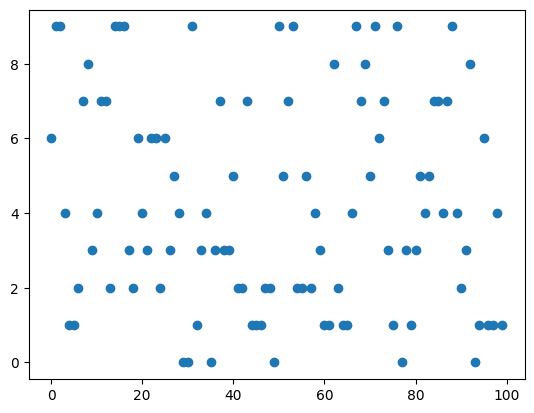

In [ ]:
plt.plot(train_label[:100], 'o')
plt.show()

画像可視化
- これらの画像は32x32ピクセルという低解像度であることが確認できます。この低解像度は、CIFAR-10データセットの特徴の一つです。

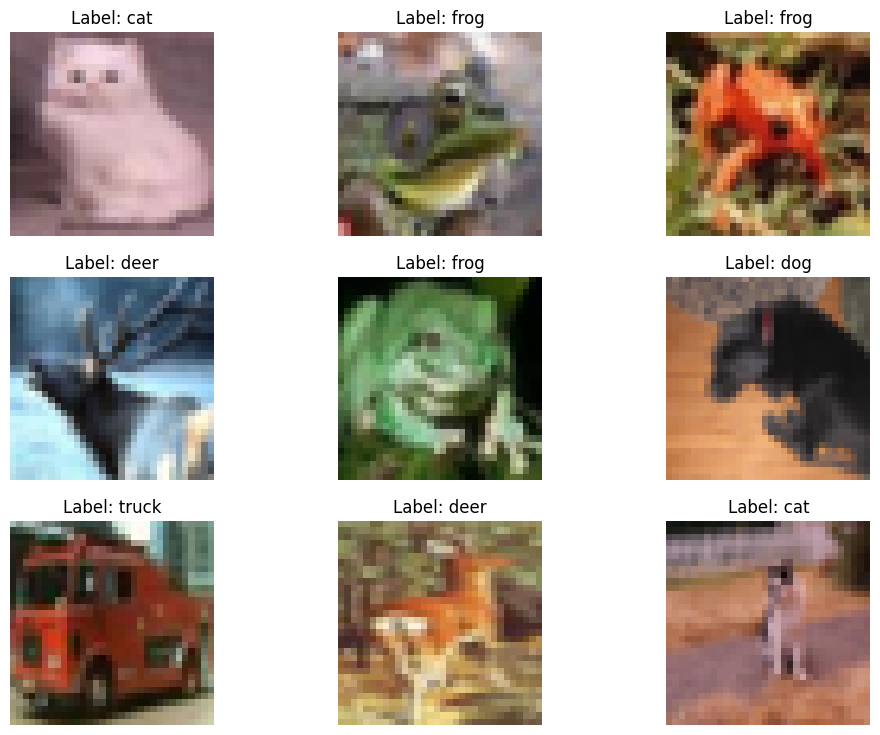

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot a few images to check if the labels are correct
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(train_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(train_data[i[0]])
    plt.title('Label: ' + str(label_names[train_label[i[0]][0]]))
    plt.axis('off')

## 10.3. CNNモデルの作成、トレーニング、評価



### CNNの作成

Kerasライブラリの主要な構造：
* レイヤー（layers）
* モデル（models）

ネットワークアーキテクチャの主要レイヤー：

1. **Input層**
* データのサイズを指定
* 今回の場合：(32,32,3)の形状, 32x32ピクセルの3チャンネル画像を表す

2. **Conv2D層**（畳み込み層）
主な引数：
* filters：レイヤーのフィルター数
* kernel_size：各フィルターの高さと幅
* padding：出力画像のサイズ調整（'same'で入力と同サイズ）

3. **MaxPooling2D層**
* pool_sizeで指定, デフォルトは2

4. **Flatten層**
* 3次元テンソルを1次元配列に変換
* 畳み込み層とプーリング層の出力を全結合層に入力するために必要

5. **全結合層**（Fully Connected Layers）
* 圧縮された特徴マップをラベルと対応付け

例えば：
```
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
```
この層は：
* 前の層（conv1a）からの入力を受け取る
* 32個のサイズ3のフィルターを持つ
* パディングにより画像サイズを保持

In [ ]:
# import the layers and the model
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
# Define the layers in the model
inputs = Input(shape=(32, 32, 3))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(pool1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(pool2)
conv3b = Conv2D(filters=128, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dense2 = Dense(64, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)

# Define the model with inputs and outputs
cifar_cnn = Model(inputs, outputs)

### マルチクラス分類問題における最終層（Dense層）

Softmax活性化関数について：
* 最終Dense層で使用
* マルチクラスの確率分布を出力
* 画像が10クラスのそれぞれに属する確率を計算

モデルの作成と確認：
* 入力層と出力層を指定してModelクラスのインスタンスを作成
* cifar_cnn.summary()でCNNのアーキテクチャを確認可能
* 各層のパラメータ数や接続状態を可視化できる

In [ ]:
# Model summary
cifar_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,186 (2.13 MB)

 Trainable params: 558,186 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

### CNNのコンパイル：

コンパイル時に指定する要素：
* 損失関数（loss function）
* オプティマイザー（optimizer）
* 評価指標（metric）

Kerasでよく使用される3つのクロスエントロピー損失：

1. `binary_crossentropy`: 2クラス分類用

2. `categorical_crossentropy`: 3クラス以上の分類用, ターゲットラベルはone-hot形式

3. `sparse_categorical_crossentropy`: 3クラス以上の分類用, ターゲットラベルは序数形式

今回のケース：
* ターゲットラベルが序数形式のため
* sparse categorical crossentropyを使用
* Adamオプティマイザーを採用
* 精度（accuracy）を評価指標として使用

In [ ]:
cifar_cnn.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

### CNNのトレーニング：

トレーニング方法：
* 全結合ニューラルネットワークと同様にfit関数を使用
* トレーニングデータ50,000画像、バッチサイズ128
* 1エポックでの更新回数：50,000/128 = 391回
* 10エポックで総トレーニングステップ数は3,910回

In [ ]:
cifar_cnn.fit(train_data, train_label, epochs=10, batch_size=128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3648 - loss: 1.7331
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6475 - loss: 0.9995
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7311 - loss: 0.7720
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7760 - loss: 0.6497
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8167 - loss: 0.5321
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8438 - loss: 0.4409
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8705 - loss: 0.3726
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8909 - loss: 0.3132
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9111 - loss: 0.2525
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9234 - loss: 0.2177


### テストデータの評価：

* `predict`関数でテストデータセットの各画像のクラスを予測
* `accuracy_score`で精度を計算

In [ ]:
from sklearn.metrics import accuracy_score

preds = cifar_cnn.predict(test_data)

accuracy = accuracy_score(test_label, np.argmax(preds, axis=1))
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
The test accuracy is 73.19 %


テストデータの予測出力

予測出力の形状：(10000,10)
* 10,000：テスト画像数, 10：クラス数

最初の5枚のテスト画像の予測結果：
* 各クラスの確率を出力 (確率の合計は1)
* 例：1枚目の画像ではクラス5に最高確率0.801を割り当て

In [ ]:
# check the shape of the predictions
preds.shape

(10000, 10)

In [ ]:
for i, pred in enumerate(preds[:5]):
    pred_str = ' '.join([f'{x:.3f}' for x in pred])
    print(f"Image {i+1}: [{pred_str}]")

Image 1: [0.001 0.000 0.000 0.527 0.000 0.016 0.005 0.000 0.017 0.433]
Image 2: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000]
Image 3: [0.018 0.000 0.000 0.002 0.000 0.000 0.000 0.000 0.979 0.000]
Image 4: [0.999 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
Image 5: [0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000]


各画像の予測結果の評価：

* `np.argmax`で各画像の最高確率のインデックスを出力
* これを正解ラベル（ground-truth）と比較

In [ ]:
print('Predictions:', np.argmax(preds[:5], axis=1))
print('Ground truth:', test_label[:5].flatten())

Predictions: [3 8 8 0 6]
Ground truth: [3 8 8 0 6]


より簡単な精度の計算方法：

* `evaluate`を使用して直接精度を算出できる
* `np.argmax`と正解ラベルの比較に加えて

In [ ]:
# Evaluate on test dataset
evals_test = cifar_cnn.evaluate(test_data, test_label)
print("Classification Accuracy: ", evals_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7308 - loss: 1.1298
Classification Accuracy:  0.7318999767303467


In [ ]:
evals_train = cifar_cnn.evaluate(train_data, train_label)
print("Training Accuracy:", evals_train[1])

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9358 - loss: 0.1814
Training Accuracy: 0.9358599781990051


トレーニング結果の重要な観察点：

* トレーニングデータの精度：約90%
* テストデータの精度：73%

これは過学習（オーバーフィット）を示しています：
* モデルがトレーニングデータを「暗記」している
* トレーニングデータでは高い予測精度
* 未知の画像に対する汎化能力が低い

次のセクションでこの問題への対処法を学びます。

### 予測結果の可視化：

モデルによる予測クラスラベルと画像をいくつか表示して確認します。

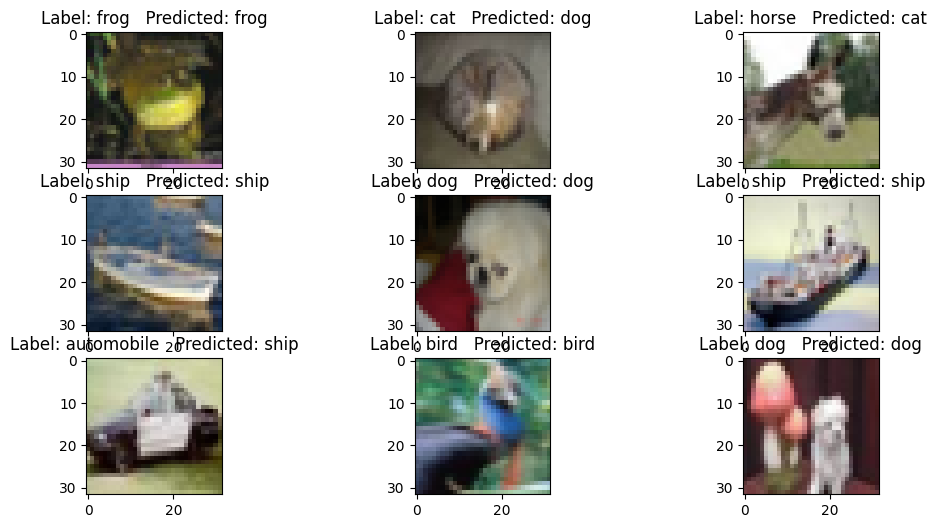

In [ ]:
# Plot a few images to check them
plt.figure(figsize=(12, 6))
for n in range(9):
    i = np.random.randint(0, len(test_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(test_data[i[0]])
    plt.title('Label: ' + str(label_names[test_label[i[0]][0]]) +
             '   Predicted: ' + str(label_names[np.argmax(preds[i[0]])]))
    plt.axis



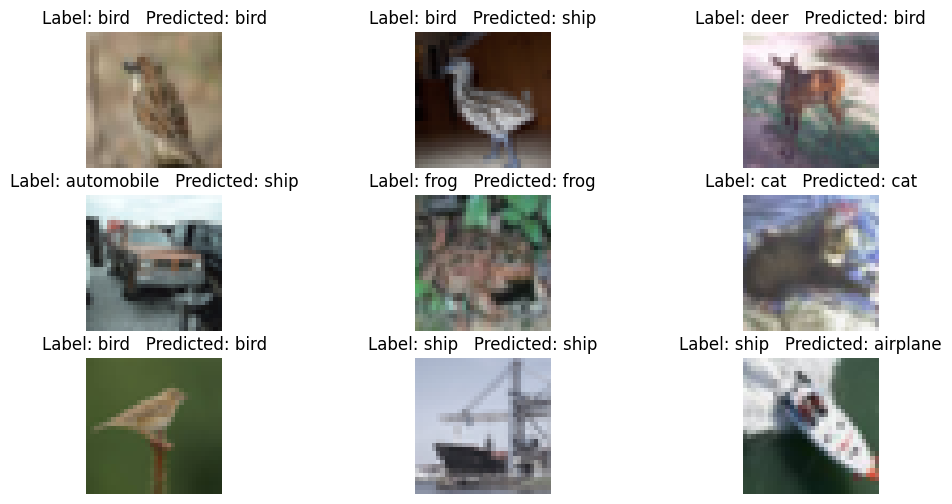

In [ ]:
plt.figure(figsize=(12, 6))
for n in range(9):
    i = np.random.randint(0, len(test_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(test_data[i[0]])
    plt.title('Label: ' + str(label_names[test_label[i[0]][0]]) + '   Predicted: ' + str(label_names[np.argmax(preds[i[0]])]))
    plt.axis('off')


## 10.4 バリデーションデータセットの導入

### バリデーションデータセット

バリデーションデータセットの目的：
* モデルの過学習を観察
* トレーニングデータを分割して作成
* トレーニング：70-80%
* バリデーション：20-30%

効果：
* 各エポック終了時にバリデーションデータでの精度を計算
* トレーニング精度が上昇しても
* バリデーション精度が低下する場合は過学習の兆候

Kerasでの実装：
* `fit`関数の`validation_split`引数で指定
* 例：20%指定の場合
  - トレーニング：40,000画像
  - バリデーション：10,000画像

注意点：
* 同じモデルでトレーニングを継続可能
* モデルを再定義・再コンパイルすると最初からトレーニング開始

この方法で過学習を観察
* トレーニング精度は上昇
* バリデーション精度は低下

In [ ]:
cifar_cnn.fit(train_data, train_label,
              epochs=10, batch_size=128,
              validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9227 - loss: 0.2150 - val_accuracy: 0.9238 - val_loss: 0.2160
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9514 - loss: 0.1398 - val_accuracy: 0.8701 - val_loss: 0.3864
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9469 - loss: 0.1517 - val_accuracy: 0.8969 - val_loss: 0.3204
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9576 - loss: 0.1268 - val_accuracy: 0.8719 - val_loss: 0.4325
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9532 - loss: 0.1356 - val_accuracy: 0.8672 - val_loss: 0.4474
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9578 - loss: 0.1242 - val_accuracy: 0.8750 - val_loss: 0.4428
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9652 - loss: 0.1030 - val_accuracy: 0.8581 - val_loss: 0.5125
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9623 - loss: 0.1162 - val_acc

In [ ]:
# Evaluate on test dataset
evals_test = cifar_cnn.evaluate(test_data, test_label)
print("Classification Accuracy: ", evals_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7191 - loss: 1.5908
Classification Accuracy:  0.7146999835968018


## 10.5 ドロップアウトレイヤー(dropout layers)

ドロップアウトレイヤー

基本的な仕組み：
* トレーニング中の各バッチ処理で
* レイヤー内のニューロンの一部をランダムに無効化
* ネットワークにランダム性を導入
* モデルの性能向上と過学習の抑制

アンサンブル手法との類似性：
* 各反復で異なるモデルをトレーニング
* 全ニューロンの一部のみを使用

実装例：
* dropout=0.2の場合
* そのレイヤーのニューロンの20%をランダムにドロップ

In [ ]:
from keras.layers import Dropout

# Define the layers
inputs  = Input(shape=(32, 32, 3))
conv1a  = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b  = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
pool1   = MaxPooling2D()(conv1b)
dropout1 = Dropout(0.2)(pool1)

conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
dropout2 = Dropout(0.2)(pool2)

conv3a = Conv2D(filters=256, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dropout3 = Dropout(0.2)(dense1)

dense2 = Dense(64, activation='relu')(dropout3)
dropout4 = Dropout(0.2)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

# Define the model with inputs and outputs
cifar_cnn_2 = Model(inputs, outputs)

In [ ]:
# compile model
cifar_cnn_2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# fit model
history = cifar_cnn_2.fit(train_data, train_label,
                          epochs = 40, batch_size = 128,
                          validation_split = 0.2, verbose=0)

In [ ]:
# Evaluate on test dataset
evals_test = cifar_cnn_2.evaluate(test_data, test_label)
print("Classification Accuracy: ", evals_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7534 - loss: 1.1761
Classification Accuracy:  0.7526999711990356


モデルの性能比較：
* ドロップアウトなし：73%
* ドロップアウトあり：75%に向上

学習曲線（learning curves）の分析：
* 青線：トレーニングデータの性能
* 赤線：バリデーションデータの性能

過学習の観察：
* 15エポック付近から開始
* トレーニング精度：上昇継続
* バリデーション精度：横ばい
* トレーニング損失：減少継続
* バリデーション損失：15エポック以降増加

注：精度と損失は相関するが、損失が変化しても精度が一定の場合もある

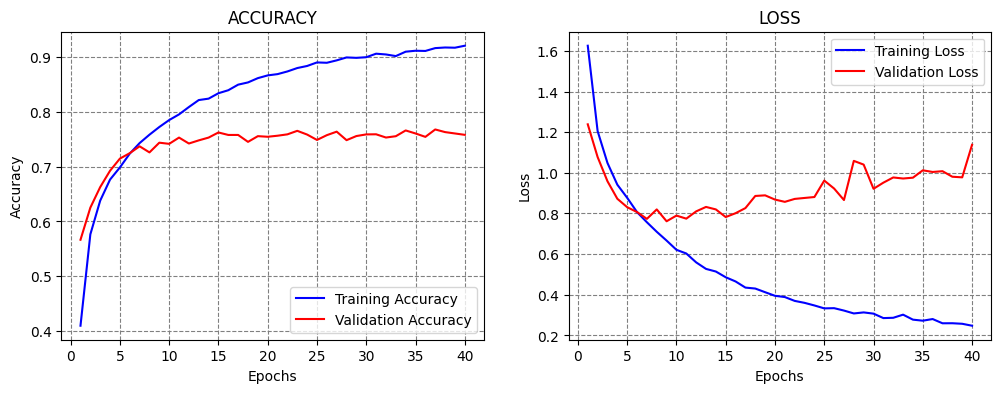

In [ ]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 10.6 バッチ正規化（Batch Normalization）

バッチ正規化を組み込んだCNNアーキテクチャについて：

ネットワークの特徴：
* フィルター数を32→64→256と段階的に増やし、複雑な特徴を抽出
* 畳み込み層の直後にバッチ正規化を配置
* ドロップアウトと組み合わせて過学習を抑制

バッチ正規化の効果：
* 各層の出力を平均0、分散1に正規化
* 層間の入力分布の変化を抑制し、学習を安定化
  - 各層での学習により、後続の層への入力分布が変化
  - バッチ正規化は各層の出力を一定の分布（平均0、分散1）に調整
* 勾配消失を防ぎ、深い層までの効果的な学習を実現
  - 深いネットワークでは、勾配が消失しやすい
  - バッチ正規化により各層の出力が適切な範囲に収まる
  - 結果として勾配が安定し、深い層まで効果的に学習可能



In [ ]:
from keras.layers import BatchNormalization

# Define the layers
inputs = Input(shape=(32, 32, 3))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
bn1 = BatchNormalization()(conv1b)   # batch normalization
pool1 = MaxPooling2D()(bn1)
dropout1 = Dropout(0.2)(pool1)
conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
bn2 = BatchNormalization()(conv2b) # batch normalization
pool2 = MaxPooling2D()(bn2)
dropout2 = Dropout(0.2)(pool2)
conv3a = Conv2D(filters=256, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
bn3 = BatchNormalization()(conv3b) # batch normalization
pool3 = MaxPooling2D()(bn3)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dropout3 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dropout3)
dropout4 = Dropout(0.2)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

# Define the model with inputs and outputs
cifar_cnn_3 = Model(inputs, outputs)

In [ ]:
# compile model
cifar_cnn_3.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

アーリーストッピングの設定を変更します：

* `verbose=0`で各エポックの表示を省略
* 代わりに学習曲線で性能を確認
* エポック数を60に増加
* `datetime`で学習時間を計測

In [ ]:
import datetime
now = datetime.datetime.now

t = now()
# fit model
history = cifar_cnn_3.fit(train_data, train_label,
                epochs=60, batch_size=128,
                validation_split=0.2, verbose=0)

print('Training time: %s' % (now() - t))

Training time: 0:08:33.033867


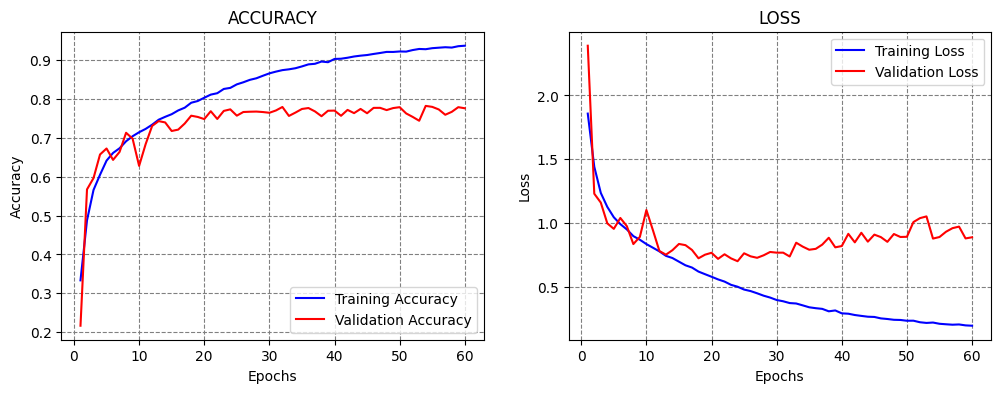

In [ ]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate on test dataset
evals_test = cifar_cnn_3.evaluate(test_data, test_label)
print("Classification Accuracy: ", evals_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7727 - loss: 0.9180
Classification Accuracy:  0.7663999795913696


バッチ正規化の追加による効果：

* テストデータの精度が77%に向上
  - ドロップアウトのみ：75%
  - オリジナルモデル：73%

## 10.7 データ拡張（Data Augmentation）

データ拡張の必要性：
* 過学習の主な原因：
  - トレーニングデータの不足
  - データの多様性の欠如

データ拡張の手法：
* 既存データセットに画像変換を適用
* 主な変換操作：
  - 垂直・水平方向の反転, 画像のクロップ, コントラストや色の変更, ノイズの追加, 回転
  
これにより、より多様なトレーニングデータを生成できます。

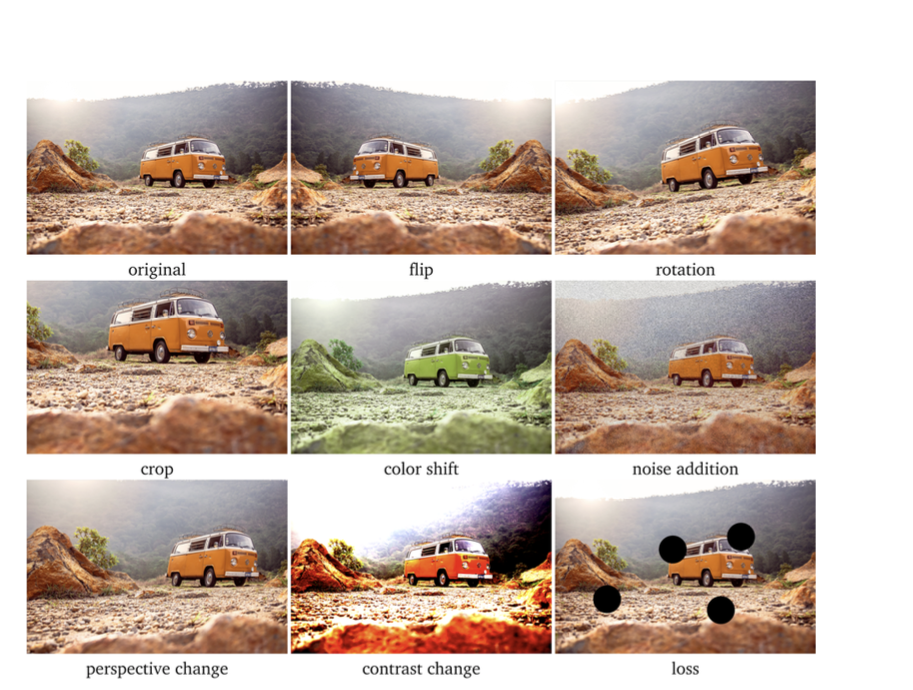

Kerasのデータ拡張機能について：

`ImageDataGenerator`で利用可能な操作：
* `rotation_range`：0-180度でランダムに回転
* `width_shift`/`height_shift`：水平/垂直方向の移動
* `shear_range`：せん断変換をランダムに適用
* `zoom_range`：ランダムにズーム
* `horizontal_flip`/`vertical_flip`：水平/垂直反転

これにより：
* 既存データから新しい画像を生成
* データの多様性を向上

例では、width_shift、height_shift、horizontal_flipを適用しています。

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

データ拡張による生成画像について：

* `ImageDataGenerator`
  - 拡張された画像とそのラベルを各バッチで返す

生成画像の特徴：
* 元画像と大きな違いはない
* 理由：
  - シフトと反転が小規模
  - 他の変換操作を未使用

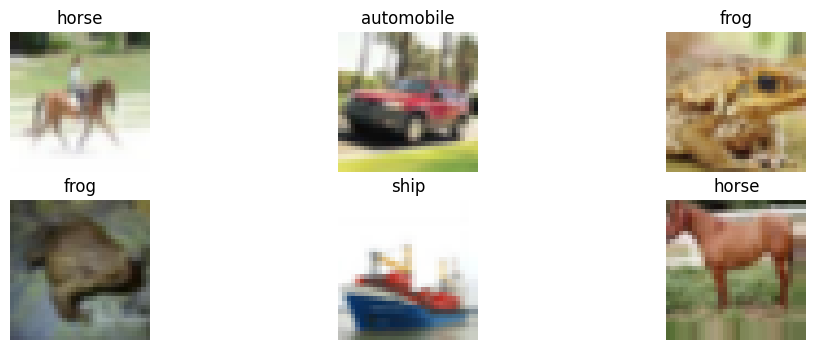

In [ ]:
# Get images in batch of 20
aug_iterator = datagen.flow(train_data, train_label, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(aug_iterator[i][0][0])
        plt.title(str(label_names[aug_iterator[i][1][0][0]]))
        plt.axis("off")

データ拡張を使用した学習の設定：

`fit`関数の変更点：
* `datagen.flow`を使用
  - 拡張画像のバッチを生成
  - `datagen`は定義済みのジェネレータ名

バリデーションデータの扱い：
* ジェネレータは`validation_split`未対応
* 手動でバリデーションデータを作成
* 作成したデータを明示的に使用

In [ ]:
# Define the model with inputs and outputs
cifar_cnn_4 = Model(inputs, outputs)

# compile model
cifar_cnn_4.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# fit model
history = cifar_cnn_4.fit(datagen.flow(train_data, train_label, batch_size=128),
                epochs=120, validation_split=0.2, verbose=0)

# note that the generator does not work with validation split

ValueError: Argument `validation_split` is only supported for tensors or NumPy arrays.Found incompatible type in the input: [<class 'keras.src.legacy.preprocessing.image.NumpyArrayIterator'>]

In [ ]:
from sklearn.model_selection import train_test_split

train_data_1, validation_data_1, train_label_1, validation_label_1 = train_test_split(train_data, train_label, test_size=0.2, random_state=20, stratify=train_label)

In [ ]:
print('Training images', train_data_1.shape)
print('Training labels', train_label_1.shape)
print('Validation_images', validation_data_1.shape)
print('Validation labels', validation_label_1.shape)

Training images (40000, 32, 32, 3)
Training labels (40000, 1)
Validation_images (10000, 32, 32, 3)
Validation labels (10000, 1)


In [ ]:
t = now()
# fit model
history= cifar_cnn_4.fit(datagen.flow(train_data_1, train_label_1, batch_size=128),
                epochs=100, validation_data=(validation_data_1, validation_label_1), verbose=0)

print('Training time: %s' % (now() - t))

In [ ]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate on test dataset
evals_test = cifar_cnn_4.evaluate(test_data, test_label)
print("Classification Accuracy: ", evals_test[1])

データ拡張の効果：

* モデルの性能が81%まで向上
  - バッチ正規化まで：77%
  - ドロップアウトまで：75%
  - オリジナル：73%

学習の特徴：
* 100エポックで約50分のトレーニング
* 学習曲線の分析：
  - 100エポック時点でも精度が上昇傾向
  - さらなるトレーニングの余地あり
  - より多いエポック数での初期設定も検討可能

## 10.8 転移学習（Transfer Learning）

**Transfer learning** uses pretrained models that are trained on very large 転移学習の概要：

主な特徴：
* 大規模データセットで学習済みのモデルを使用
* 小規模データセットでの性能向上が目的

一般的な手順：
1. 事前学習済みモデル（ベースモデル）の初期化
   * 重みの読み込み
   * 上層（全結合層）の削除

2. 新しいモデルの作成
   * ベースモデルの上に新しい学習可能な全結合層を追加

3. モデルの学習と評価

VGG16の例：
* ImageNetで事前学習（120万画像、1000クラス）
* 1000クラス用の密結合層を削除
* 10クラス用の新しい層を追加

これは「モデルの微調整（fine-tuning）」とも呼ばれます。


In [ ]:
from tensorflow.keras.applications import vgg16
from keras.layers import GlobalAveragePooling2D

base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

# The model we will train
cifar_cnn_5 = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### アーリーストッピング（Early Stopping）

Kerasのコールバック機能について：

アーリーストッピング（EarlyStopping）の仕組み：
* 特定の指標（例：バリデーション損失）を監視
* 指定エポック数（patience）の間、改善が見られない場合
* 自動的にトレーニングを終了

「改善」の定義：
* 損失の場合：減少
* 精度の場合：増加

これにより、無駄なトレーニングを避け、過学習を防ぐことができます。

In [ ]:
from keras.callbacks import EarlyStopping

cifar_cnn_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# fit model
t = now()
history = cifar_cnn_5.fit(train_data, train_label, validation_split=0.2, batch_size=128,
                    epochs=100, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])

print('Training time: %s' % (now() - t))

Training time: 0:08:15.039799


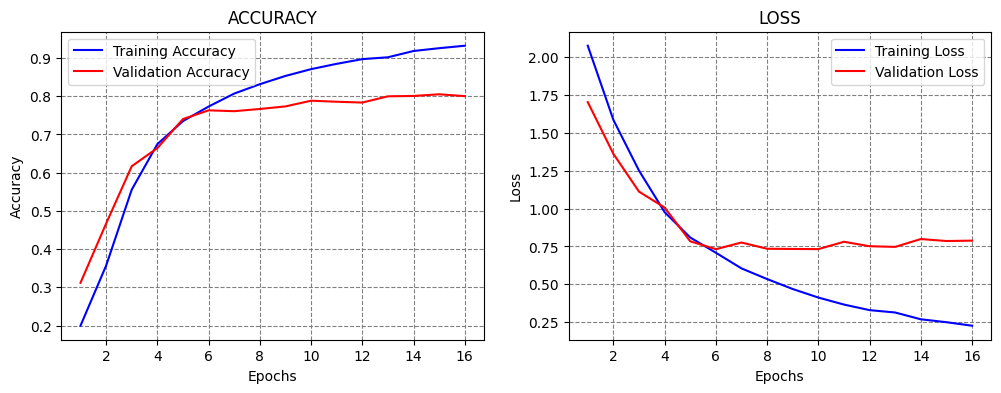

In [ ]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate on test dataset
evals_test = cifar_cnn_5.evaluate(test_data, test_label)
print("Classification Accuracy: ", evals_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7904 - loss: 0.8536
Classification Accuracy:  0.7901999950408936


アーリーストッピングの効果：

トレーニング時間の大幅な短縮：
* 15エポック程度で終了
* 従来の100エポック以上と比較して効率的

動作の仕組み：
* バリデーション損失が最小：エポック6
* patience：10エポック
* 終了：エポック16（改善なし）
* バリデーション損失の増加を検知して学習終了

このように、モデルは最適なタイミングで自動的に学習を終了します。

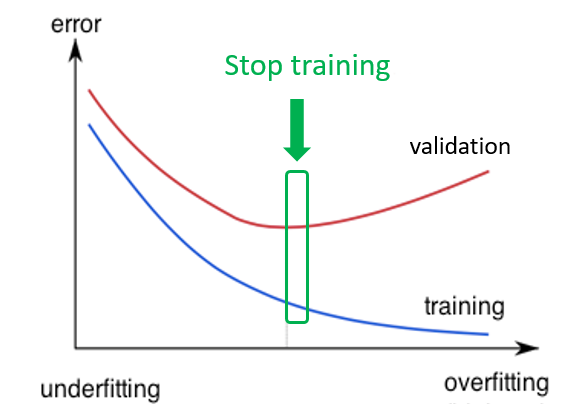

事前学習済みモデルを使用し、データ拡張とアーリーストッピングを組み合わせる。

In [ ]:
# The model we will train
cifar_cnn_6 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# compile model
cifar_cnn_6.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
t = now()
# fit model
history= cifar_cnn_6.fit(datagen.flow(train_data_1, train_label_1, batch_size=128),
                epochs=100, validation_data=(validation_data_1, validation_label_1), verbose=0,
                callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])

print('Training time: %s' % (now() - t))

Training time: 0:25:30.829182


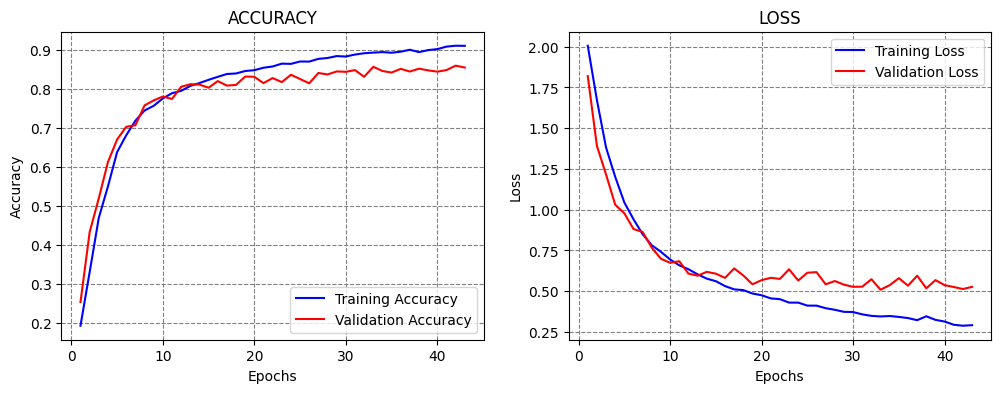

In [ ]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate on test dataset
evals_test = cifar_cnn_6.evaluate(test_data, test_label)
print("Classification Accuracy: ", evals_test[1])

転移学習とデータ拡張の組み合わせにより、精度が84%まで向上しました。